In [ ]:
import pandas as pd
df=pd.read_csv("/content/DS.csv", encoding='latin1')
df.head(5)

,Timestamp,Age,Gender,Purchase frequency,Size,Price,Brand,Type,Material,Rating,Review,color[Formal],color [Casual],color [Sports],Brand type,DATE OF LAST PURCHASE OF SHOES
0,2025/07/14 8:16:29 PM GMT+5:30,19.0,Female,1,8.0,500 -1000,Bata,Casual,Canvas,4.0,Durability,Black,Black,Neon,International,05-04-2024
1,2025/07/14 8:20:15 PM GMT+5:30,36.0,Female,2=3,7.0,500 -1000,Bata,Casual,Synthetic,4.0,Durability,Black,Brown,Black,International,06-05-2024
2,2025/07/14 8:23:45 PM GMT+5:30,18.0,Female,1,6.0,500 -1000,Bata,Casual,Synthetic,3.0,Comfort;Price;Design/style,Black,White,Black,Both equally,04-10-2025
3,2025/07/14 8:30:16 PM GMT+5:30,17.0,Male,2 =3,6.0,500-1000,Other: [Short Answer],Sports,Rubber,5.0,Other: _____,Black,White,White,Both equally,06-08-2024
4,2025/07/14 8:30:55 PM GMT+5:30,20.0,Female,1,25.0,500- 1000,Sparx,Boots,Synthetic,3.0,Design/style,Black,Black,Black,National,20-12-2025


In [ ]:
df.shape

(111, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Timestamp                       104 non-null    object 
 1   Age                             104 non-null    float64
 2   Gender                          104 non-null    object 
 3    Purchase frequency             104 non-null    object 
 4     Size                          104 non-null    float64
 5   Price                           104 non-null    object 
 6   Brand                           104 non-null    object 
 7   Type                            104 non-null    object 
 8   Material                        104 non-null    object 
 9   Rating                          104 non-null    float64
 10  Review                          104 non-null    object 
 11  color[Formal]                   104 non-null    object 
 12  color [Casual]                  104 

In [ ]:
df.describe()

,Age,Size,Rating
count,104.000000,104.000000,104.000000
mean,27.759615,7.288462,4.250000
std,9.849839,4.191237,0.747163
min,15.000000,4.000000,2.000000
25%,19.000000,6.000000,4.000000
50%,25.500000,6.500000,4.000000
75%,32.000000,8.000000,5.000000
max,56.000000,43.000000,5.000000


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: Index(['Timestamp', 'Gender  ', ' Purchase frequency  ', 'Price ', 'Brand',
       'Type', 'Material', 'Review ', 'color[Formal] ', 'color [Casual]',
       'color [Sports]', 'Brand type ', 'DATE OF LAST PURCHASE OF SHOES'],
      dtype='object')
Numerical Columns: Index(['Age', '  Size ', 'Rating'], dtype='object')


In [ ]:
df.columns = df.columns.str.strip()
df['Gender'].value_counts()

,count
Gender,
Female,55
Male,48
Prefer not to say,1


In [ ]:
df['Age'].min(),df['Age'].max()


(15.0, 56.0)

In [ ]:
df['DATE OF LAST PURCHASE OF SHOES'] = pd.to_datetime(
    df['DATE OF LAST PURCHASE OF SHOES'],
    errors='coerce',
    dayfirst=True
)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Timestamp                       104 non-null    object        
 1   Age                             104 non-null    float64       
 2   Gender                          104 non-null    object        
 3   Purchase frequency              104 non-null    object        
 4   Size                            104 non-null    float64       
 5   Price                           104 non-null    object        
 6   Brand                           104 non-null    object        
 7   Type                            104 non-null    object        
 8   Material                        104 non-null    object        
 9   Rating                          104 non-null    float64       
 10  Review                          104 non-null    object        
 11  color[

In [ ]:
df['Type'].mode()

,Type
0,Casual


In [ ]:
df['Brand'].unique()

array(['Bata', 'Other: [Short Answer]', 'Sparx', 'Relaxo', 'Puma',
       '-- Indian Brands --', 'Nike', 'Campus', 'Metro Shoes', 'RedTape',
       'Liberty', 'Woodland', 'Adidas', 'Paragon', 'Asian',
       '-- International Brands --', nan], dtype=object)

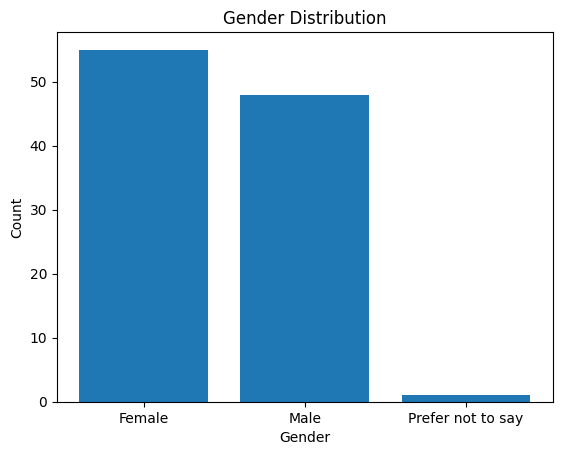

In [ ]:
import matplotlib.pyplot as plt
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

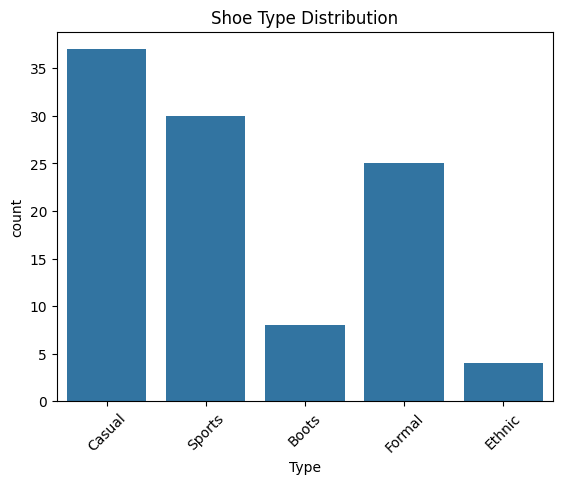

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Type', data=df)
plt.xticks(rotation=45)
plt.title('Shoe Type Distribution')
plt.show()


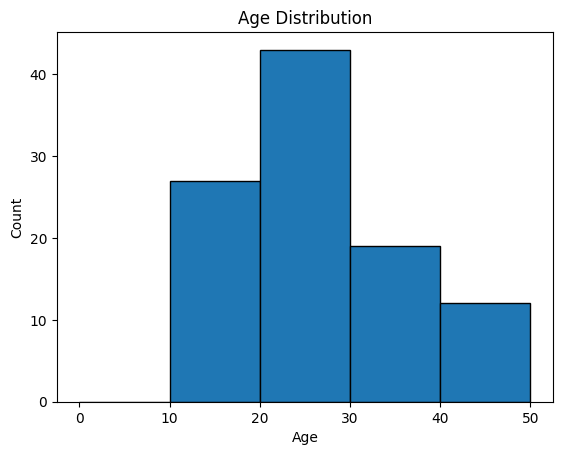

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
b=[0,10,20,30,40,50]
plt.hist(df['Age'], bins=b,edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

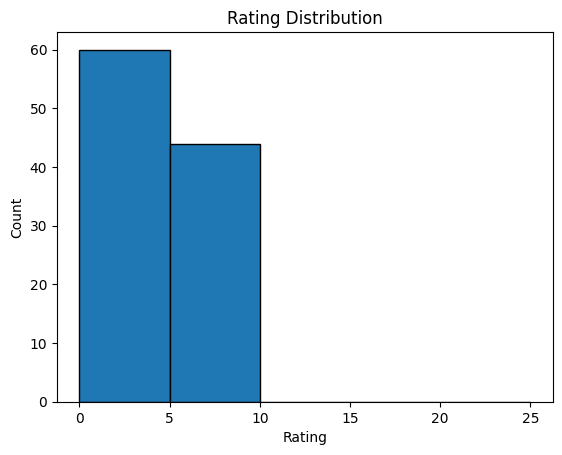

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
b=[0,5,10,15,20,25]
plt.hist(df['Rating'], bins=b,edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()

In [ ]:
df.columns = df.columns.str.strip()
df['Purchase frequency'] = df['Purchase frequency'].str.replace(" ", "")
df['Purchase frequency'] = df['Purchase frequency'].replace({
    '1': 'Once',
    '2=3': '2-3',
    '2=3': '2-3',
    '2=3': '2-3'
})
df['Purchase frequency'].value_counts()

,count
Purchase frequency,
2-3,50
Once,40
4=5,12
3=4,1
2â3times,1


In [ ]:
def price_mid(value):
    try:
        nums = value.replace(" ", "").split('-')
        return (int(nums[0]) + int(nums[1])) / 2
    except:
        return None

df['Price_mid'] = df['Price'].apply(price_mid)
df['Price_mid'].head()


,Price_mid
0,750.0
1,750.0
2,750.0
3,750.0
4,750.0


In [ ]:
df['Brand'] = df['Brand'].str.strip().str.title()
df['Brand'].head()

,Brand
0,Bata
1,Bata
2,Bata
3,Other: [Short Answer]
4,Sparx


In [ ]:
df['Brand'] = df['Brand'].replace(
    'Other: [Short Answer]', 'Other'
)
df['Brand'].value_counts()


,count
Brand,
Bata,26
Sparx,20
Nike,11
Puma,8
-- Indian Brands --,8
Adidas,7
Campus,6
Paragon,5
Relaxo,4


In [ ]:
df['Material'] = df['Material'].str.strip().str.title()
df['Material'].value_counts()

,count
Material,
Canvas,26
Leather,26
Mesh,21
Synthetic,14
Rubber,11
Others,6


In [ ]:
df[['Purchase frequency', 'Price', 'Price_mid', 'Brand','Material']].head()

,Purchase frequency,Price,Price_mid,Brand,Material
0,Once,500 -1000,750.0,Bata,Canvas
1,2-3,500 -1000,750.0,Bata,Synthetic
2,Once,500 -1000,750.0,Bata,Synthetic
3,2-3,500-1000,750.0,Other: [Short Answer],Rubber
4,Once,500- 1000,750.0,Sparx,Synthetic


In [ ]:
from sklearn.preprocessing import LabelEncoder

le_gender = LabelEncoder()
df['Gender_encoded'] = le_gender.fit_transform(df['Gender'])
df['Gender_encoded'].head()


,Gender_encoded
0,0
1,0
2,0
3,1
4,0


In [ ]:
le_brand = LabelEncoder()
df['Brand type_encoded'] = le_brand.fit_transform(df['Brand type'])
df['Brand type_encoded'].head()


,Brand type_encoded
0,1
1,1
2,0
3,0
4,2


In [ ]:
def age_group(age):
    if age < 20:
        return 'Teen'
    elif age <= 30:
        return 'Young Adult'
    else:
        return 'Adult'

df.groupby('Age_group')['Age'].count()


,Age
Age_group,
Adult,29
Teen,27
Young Adult,48


In [ ]:
from datetime import datetime
import pandas as pd

df['DATE OF LAST PURCHASE OF SHOES'] = pd.to_datetime(
    df['DATE OF LAST PURCHASE OF SHOES'],
    errors='coerce',
    dayfirst=True
)

current_year = datetime.now().year
df['Years_since_last_purchase'] = current_year - df['DATE OF LAST PURCHASE OF SHOES'].dt.year
df['Years_since_last_purchase'].head()

,Years_since_last_purchase
0,2.0
1,2.0
2,1.0
3,2.0
4,1.0


In [ ]:
df['Purchase_frequency_num'] = df['Purchase frequency'].replace({
    'Once': 1,
    '2-3': 2.5,
    'More': 4
})
df['Purchase_frequency_num'].head()


,Purchase_frequency_num
0,1
1,2.5
2,1
3,2.5
4,1


In [ ]:
pivot_table = pd.pivot_table(
    df,
    index='Type',
    columns='Material',
    aggfunc='size',
    fill_value=0
)

pivot_table


Material,Canvas,Leather,Mesh,Others,Rubber,Synthetic
Type,,,,,,
Boots,0,2,2,1,1,2
Casual,13,5,8,3,4,4
Ethnic,0,1,1,0,0,2
Formal,5,15,0,1,1,3
Sports,8,3,10,1,5,3


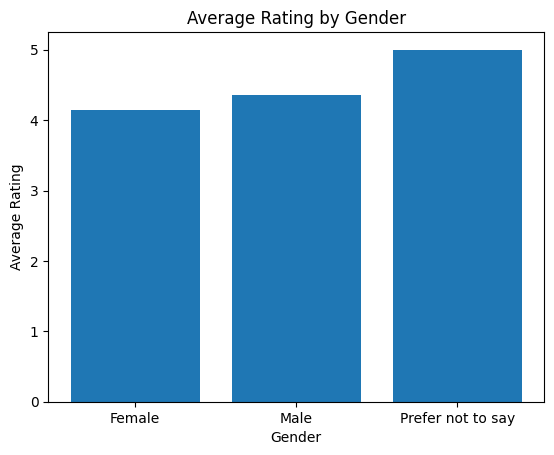

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

average_rating_by_gender = df.groupby('Gender')['Rating'].mean()

plt.bar(average_rating_by_gender.index, average_rating_by_gender.values)
plt.xlabel('Gender')
plt.ylabel('Average Rating')
plt.title('Average Rating by Gender')
plt.show()

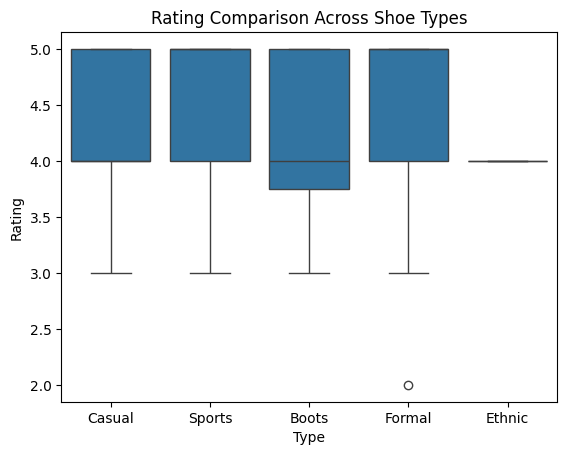

In [ ]:
sns.boxplot(x='Type', y='Rating', data=df)
plt.title('Rating Comparison Across Shoe Types')
plt.show()


In [ ]:
df.to_csv('csdata.csv', index=False)
df.head()


,Timestamp,Age,Gender,Purchase frequency,Size,Price,Brand,Type,Material,Rating,...,color [Casual],color [Sports],Brand type,DATE OF LAST PURCHASE OF SHOES,Price_mid,Gender_encoded,Brand type_encoded,Age_group,Years_since_last_purchase,Purchase_frequency_num
0,2025/07/14 8:16:29 PM GMT+5:30,19.0,Female,Once,8.0,500 -1000,Bata,Casual,Canvas,4.0,...,Black,Neon,International,2024-04-05,750.0,0,1,Teen,2.0,1
1,2025/07/14 8:20:15 PM GMT+5:30,36.0,Female,2-3,7.0,500 -1000,Bata,Casual,Synthetic,4.0,...,Brown,Black,International,2024-05-06,750.0,0,1,Adult,2.0,2.5
2,2025/07/14 8:23:45 PM GMT+5:30,18.0,Female,Once,6.0,500 -1000,Bata,Casual,Synthetic,3.0,...,White,Black,Both equally,2025-10-04,750.0,0,0,Teen,1.0,1
3,2025/07/14 8:30:16 PM GMT+5:30,17.0,Male,2-3,6.0,500-1000,Other,Sports,Rubber,5.0,...,White,White,Both equally,2024-08-06,750.0,1,0,Teen,2.0,2.5
4,2025/07/14 8:30:55 PM GMT+5:30,20.0,Female,Once,25.0,500- 1000,Sparx,Boots,Synthetic,3.0,...,Black,Black,National,2025-12-20,750.0,0,2,Young Adult,1.0,1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [ ]:
import pandas as pd
df=pd.read_csv("/content/DS.csv", encoding='latin1')
df.columns = df.columns.str.strip()
df['Comfort_mentioned'] = df['Review'].str.contains('Comfort', case=False, na=False).astype(int)
df['Comfort_mentioned'].head()

,Comfort_mentioned
0,0
1,0
2,1
3,0
4,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Rating_normalized'] = scaler.fit_transform(df[['Rating']])
df['Rating_normalized'].head()

,Rating_normalized
0,0.666667
1,0.666667
2,0.333333
3,1.000000
4,0.333333


In [ ]:
avg_rating_brand = df.groupby('Brand')['Rating'].mean()
avg_rating_brand


,Rating
Brand,
-- Indian Brands --,3.875000
-- International Brands --,5.000000
Adidas,4.000000
Asian,5.000000
Bata,4.307692
Campus,4.166667
Liberty,3.666667
Metro Shoes,4.000000
Nike,5.000000
